In [2]:
import pandas as pd

df = pd.read_csv('dataset/SeoulBikeData.csv')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,Winter,No Holiday,Yes


In [4]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['weekday'] = df['Date'].dt.dayofweek

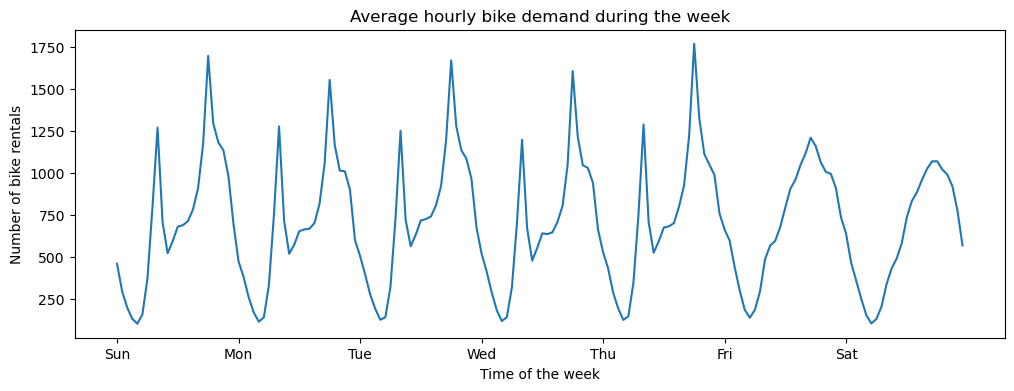

In [6]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df.groupby(["weekday", "Hour"])["Rented Bike Count"].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

NameError: name 'sns' is not defined

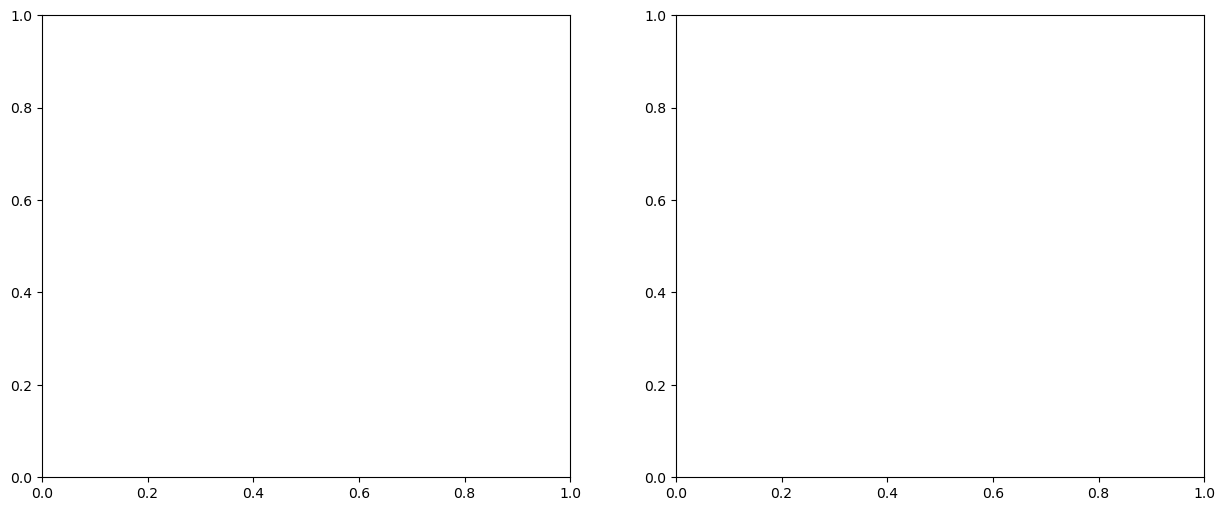

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Rainfall vs Rented Bike Count
sns.scatterplot(x='Rainfall(mm)', y='Rented Bike Count', data=df, ax=ax1, alpha=0.6)
ax1.set_title('Rainfall vs Rented Bike Count')
ax1.set_xlabel('Rainfall (mm)')
ax1.set_ylabel('Rented Bike Count')

# Snowfall vs Rented Bike Count
sns.scatterplot(x='Snowfall (cm)', y='Rented Bike Count', data=df, ax=ax2, alpha=0.6)
ax2.set_title('Snowfall vs Rented Bike Count')
ax2.set_xlabel('Snowfall (cm)')
ax2.set_ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np


# 수치형 컬럼만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# 히트맵 생성
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# 컬럼 이름 추가
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# 컬러바 추가
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

ax.set_title("Correlation Heatmap")
fig.tight_layout()
plt.show()

In [8]:
df.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
weekday                     0
dtype: int64